# Import Libraries

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [99]:
data = pd.read_csv("1000_Companies.csv")
print(data.head())

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [100]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,1000.0,81668.927200,46537.567891,0.00,43084.500000,79936.00000,124565.500000,165349.20
Administration,1000.0,122963.897612,12613.927535,51283.14,116640.684850,122421.61215,129139.118000,321652.14
Marketing Spend,1000.0,226205.058419,91578.393542,0.00,150969.584600,224517.88735,308189.808525,471784.10
Profit,1000.0,119546.164656,42888.633848,14681.40,85943.198543,117641.46630,155577.107425,476485.43


In [101]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [102]:
data.shape

(1000, 4)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   Profit           1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [104]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [105]:
corr = data.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


# Visualize The Dataset

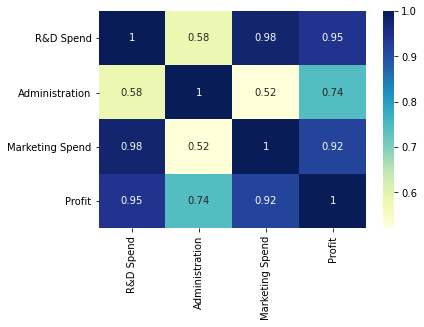

In [106]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

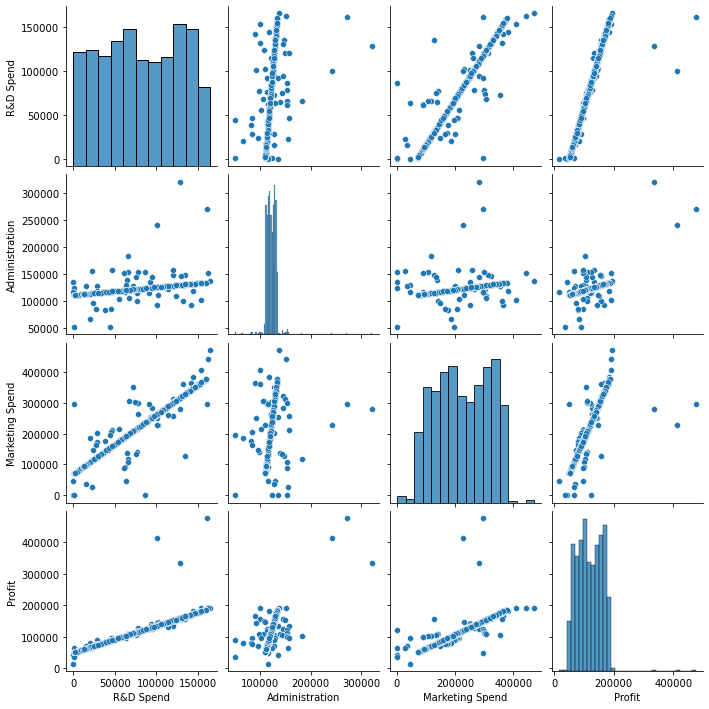

In [107]:
sns.pairplot(data)
plt.show()

# Split dataset into training set and test set

In [108]:
# Dividing input and output data to train and test data
# Training : Testing = 80 : 20
x = data.iloc[:,:-1] # which simply means take all rows and all columns except last one
y = data['Profit']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2,)
print(xtrain.shape)

(800, 3)


# Fit LinearRegression Model

In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [110]:
pred = model.predict(xtest)


In [111]:
testing_data_model_score = model.score(xtest, ytest)
print("Model Score/Accuracy on Testing data",testing_data_model_score)

training_data_model_score = model.score(xtrain, ytrain)
print("Model Score/Accuracy on Training data",training_data_model_score)

Model Score/Accuracy on Testing data 0.9844591744876292
Model Score/Accuracy on Training data 0.9418378602225068


# Measure Accuracy


In [112]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2Score = r2_score(pred, ytest)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 98.46417286821047


In [113]:
input_data = np.array([144372.41 , 118671.85 , 383199.62  ])

input_data_reshape = input_data.reshape(1, -1)
prediction = model.predict(input_data_reshape)
print(prediction)

[162038.49811173]


In [114]:
import pickle

In [115]:
filename = 'profit_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [116]:
# loading the saved model
loaded_model = pickle.load(open('profit_model.sav', 'rb'))